In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
data = pd.read_csv("IMOVIRTUAL.csv", sep=";") #importação dos dados

In [3]:
data.head()

,Nome de anuncio,Link,Preco,Data de Extração,Preco/m2,Rua/Local/Zona,ID,Freguesia,Municipio,Distrito,...,Piscina,Box,Elevador,Kitchenette,Marquise,Parqueamento,Piso Radiante,Terraco,Vista de Lago,Caldeira
0,b'Apartamento T2 em Vila Nova de Milfontes- Od...,https://www.imovirtual.com/pt/anuncio/apartame...,165000,09/05/2021,1672,Rua do Pinhal,BejaOdemiraVila Nova de Milfontes,Vila Nova de Milfontes,ODEMIRA,BEJA,...,NaN,NaN,NaN,s,NaN,NaN,NaN,s,NaN,NaN
1,b'Apartamento T3 Venda em Barcelos- Vila Boa e...,https://www.imovirtual.com/pt/anuncio/apartame...,335000,09/05/2021,2010,Rua Arquitecto Antonio Borges Vinagre,BragaBarcelosArcozelo,Arcozelo,BARCELOS,BRAGA,...,NaN,NaN,s,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b'Apartamento T3 no centro da cidade de Barcelos',https://www.imovirtual.com/pt/anuncio/apartame...,225000,09/05/2021,1731,Rua Arquitecto Antonio Borges Vinagre,BragaBarcelosArcozelo,Arcozelo,BARCELOS,BRAGA,...,NaN,NaN,s,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,b'Apartamento T2 no centro de Barcelos',https://www.imovirtual.com/pt/anuncio/apartame...,180000,09/05/2021,1714,Rua Dom Afonso,BragaBarcelosArcozelo,Arcozelo,BARCELOS,BRAGA,...,s,NaN,s,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,b'Moradia T3 rua do Sapugal em Fradelos - V.N....,https://www.imovirtual.com/pt/anuncio/moradia-...,229000,09/05/2021,836,Rua do Sapugal,BragaBarcelosPerelhal,Perelhal,BARCELOS,BRAGA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,s,NaN,s


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6228 entries, 0 to 6227
Data columns (total 46 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Nome de anuncio         6228 non-null   object 
 1   Link                    6228 non-null   object 
 2   Preco                   6228 non-null   int64  
 3   Data de Extração        6228 non-null   object 
 4   Preco/m2                6228 non-null   object 
 5   Rua/Local/Zona          3071 non-null   object 
 6   ID                      6228 non-null   object 
 7   Freguesia               6228 non-null   object 
 8   Municipio               6228 non-null   object 
 9   Distrito                6228 non-null   object 
 10  area util (m2)          6228 non-null   int64  
 11  area bruta (m2)         5474 non-null   float64
 12  Tipologia               6228 non-null   object 
 13  Ano                     6228 non-null   int64  
 14  No Casas de Banho       6020 non-null   

In [5]:
#missing data para ver que colunas são irrelevantes

total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(100)

,Total,Percent
Vista de Lago,6208,0.996789
Recuperacao de Calor,5960,0.956969
Negociavel,5925,0.951349
Piso Radiante,5914,0.949583
Box,5863,0.941394
Marquise,5840,0.937701
Vista de Campo/Serra,5817,0.934008
Mobilado,5754,0.923892
Caldeira,5745,0.922447
Vista de Rio,5669,0.910244


In [6]:
data.groupby(['Preco']).size()

Preco
39900      1
45000      1
50000      1
53000      1
56000      1
          ..
4200000    2
5300000    1
5700000    3
6500000    1
7950000    3
Length: 1019, dtype: int64

In [7]:
#descriptive statistics summary
data['Preco'].describe()

count    6.228000e+03
mean     3.747650e+05
std      4.080052e+05
min      3.990000e+04
25%      1.750000e+05
50%      2.650000e+05
75%      4.278500e+05
max      7.950000e+06
Name: Preco, dtype: float64

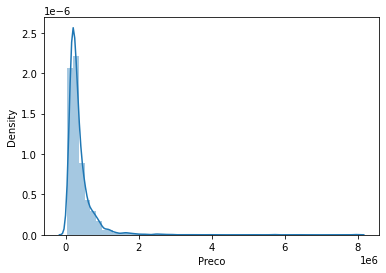

In [8]:
#histogram
sns.distplot(data['Preco']);

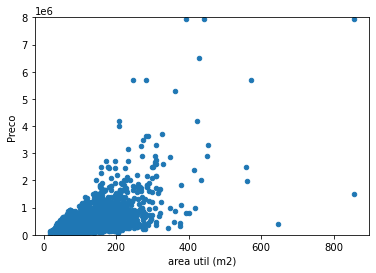

In [9]:
#scatter plot totalbsmtsf/saleprice
var = 'area util (m2)'
scatter = pd.concat([data['Preco'], data[var]], axis=1)
scatter.plot.scatter(x=var, y='Preco', ylim=(0,8000000));

In [10]:
#remover coluna ID
data.drop("ID", axis=1, inplace=True)

In [11]:
#verificar se coluna saiu
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6228 entries, 0 to 6227
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Nome de anuncio         6228 non-null   object 
 1   Link                    6228 non-null   object 
 2   Preco                   6228 non-null   int64  
 3   Data de Extração        6228 non-null   object 
 4   Preco/m2                6228 non-null   object 
 5   Rua/Local/Zona          3071 non-null   object 
 6   Freguesia               6228 non-null   object 
 7   Municipio               6228 non-null   object 
 8   Distrito                6228 non-null   object 
 9   area util (m2)          6228 non-null   int64  
 10  area bruta (m2)         5474 non-null   float64
 11  Tipologia               6228 non-null   object 
 12  Ano                     6228 non-null   int64  
 13  No Casas de Banho       6020 non-null   float64
 14  Certificado Energetico  5078 non-null   

In [12]:
#remover restantes colunas irrelevantes
data.drop(["Nome de anuncio","Link","Data de Extração","Preco/m2","Rua/Local/Zona","Freguesia",
          "Municipio","area bruta (m2)","Negociavel"], axis=1, inplace=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6228 entries, 0 to 6227
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Preco                   6228 non-null   int64  
 1   Distrito                6228 non-null   object 
 2   area util (m2)          6228 non-null   int64  
 3   Tipologia               6228 non-null   object 
 4   Ano                     6228 non-null   int64  
 5   No Casas de Banho       6020 non-null   float64
 6   Certificado Energetico  5078 non-null   object 
 7   Condicao                5445 non-null   object 
 8   Varanda                 3316 non-null   object 
 9   Ar Condicionado         2584 non-null   object 
 10  Aspiracao Central       704 non-null    object 
 11  Vista de Campo/Serra    411 non-null    object 
 12  Lareira                 652 non-null    object 
 13  Recuperacao de Calor    268 non-null    object 
 14  Suite                   2268 non-null   

In [14]:
data.head()

,Preco,Distrito,area util (m2),Tipologia,Ano,No Casas de Banho,Certificado Energetico,Condicao,Varanda,Ar Condicionado,...,Piscina,Box,Elevador,Kitchenette,Marquise,Parqueamento,Piso Radiante,Terraco,Vista de Lago,Caldeira
0,165000,BEJA,98,T2,1990,1.0,D,Usado,NaN,NaN,...,NaN,NaN,NaN,s,NaN,NaN,NaN,s,NaN,NaN
1,335000,BRAGA,166,T3,2021,3.0,B,Em construcao,s,NaN,...,NaN,NaN,s,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,225000,BRAGA,130,T3,2020,3.0,B,Em construcao,s,NaN,...,NaN,NaN,s,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,180000,BRAGA,105,T2,2020,2.0,B,Em construcao,s,s,...,s,NaN,s,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,229000,BRAGA,274,T3,2003,3.0,D,Renovado,s,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,s,NaN,s


In [15]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(100)

,Total,Percent
Vista de Lago,6208,0.996789
Recuperacao de Calor,5960,0.956969
Piso Radiante,5914,0.949583
Box,5863,0.941394
Marquise,5840,0.937701
Vista de Campo/Serra,5817,0.934008
Mobilado,5754,0.923892
Caldeira,5745,0.922447
Vista de Rio,5669,0.910244
Lareira,5576,0.895311


In [16]:
data.isnull().sum()

Preco                        0
Distrito                     0
area util (m2)               0
Tipologia                    0
Ano                          0
No Casas de Banho          208
Certificado Energetico    1150
Condicao                   783
Varanda                   2912
Ar Condicionado           3644
Aspiracao Central         5524
Vista de Campo/Serra      5817
Lareira                   5576
Recuperacao de Calor      5960
Suite                     3960
Despensa                  5248
Garagem (box)             4403
Arrecadacao               4571
Vista de Mar              5496
Vista de Rio              5669
Cozinha Equipada          3308
Aquecimento Central       4911
Mobilado                  5754
Estacionamento            4228
Condominio Fechado        5244
Gas Canalizado            3936
Piscina                   5475
Box                       5863
Elevador                  1925
Kitchenette               5559
Marquise                  5840
Parqueamento              4988
Piso Rad

In [17]:
data.groupby(['No Casas de Banho']).size()

No Casas de Banho
1.0    1856
2.0    2630
3.0    1160
4.0     374
dtype: int64

In [18]:
data['No Casas de Banho'].fillna(2,inplace=True)

In [19]:
data.groupby(['Ano']).size()

Ano
1620       1
1753       6
1900       2
1903       1
1904       1
        ... 
2020     826
2021    1320
2022     571
2023      45
2024       4
Length: 99, dtype: int64

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6228 entries, 0 to 6227
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Preco                   6228 non-null   int64  
 1   Distrito                6228 non-null   object 
 2   area util (m2)          6228 non-null   int64  
 3   Tipologia               6228 non-null   object 
 4   Ano                     6228 non-null   int64  
 5   No Casas de Banho       6228 non-null   float64
 6   Certificado Energetico  5078 non-null   object 
 7   Condicao                5445 non-null   object 
 8   Varanda                 3316 non-null   object 
 9   Ar Condicionado         2584 non-null   object 
 10  Aspiracao Central       704 non-null    object 
 11  Vista de Campo/Serra    411 non-null    object 
 12  Lareira                 652 non-null    object 
 13  Recuperacao de Calor    268 non-null    object 
 14  Suite                   2268 non-null   

In [21]:
data.groupby(['Tipologia']).size()

Tipologia
T0      152
T1      957
T10       1
T2     2284
T3     2164
T4      537
T5      104
T6       25
T7        2
T8        1
T9        1
dtype: int64

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6228 entries, 0 to 6227
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Preco                   6228 non-null   int64  
 1   Distrito                6228 non-null   object 
 2   area util (m2)          6228 non-null   int64  
 3   Tipologia               6228 non-null   object 
 4   Ano                     6228 non-null   int64  
 5   No Casas de Banho       6228 non-null   float64
 6   Certificado Energetico  5078 non-null   object 
 7   Condicao                5445 non-null   object 
 8   Varanda                 3316 non-null   object 
 9   Ar Condicionado         2584 non-null   object 
 10  Aspiracao Central       704 non-null    object 
 11  Vista de Campo/Serra    411 non-null    object 
 12  Lareira                 652 non-null    object 
 13  Recuperacao de Calor    268 non-null    object 
 14  Suite                   2268 non-null   

In [23]:
#substituir os NaN do ertificado energetico pela moda (A)
data["Certificado Energetico"].fillna("A", inplace=True)

In [24]:
#substituir os NaN da Condicao pela moda (Usado)
data["Condicao"].fillna("Usado", inplace=True)

In [25]:
data.isnull().sum()

Preco                        0
Distrito                     0
area util (m2)               0
Tipologia                    0
Ano                          0
No Casas de Banho            0
Certificado Energetico       0
Condicao                     0
Varanda                   2912
Ar Condicionado           3644
Aspiracao Central         5524
Vista de Campo/Serra      5817
Lareira                   5576
Recuperacao de Calor      5960
Suite                     3960
Despensa                  5248
Garagem (box)             4403
Arrecadacao               4571
Vista de Mar              5496
Vista de Rio              5669
Cozinha Equipada          3308
Aquecimento Central       4911
Mobilado                  5754
Estacionamento            4228
Condominio Fechado        5244
Gas Canalizado            3936
Piscina                   5475
Box                       5863
Elevador                  1925
Kitchenette               5559
Marquise                  5840
Parqueamento              4988
Piso Rad

In [26]:
#Vamos agora substituir os NaN que restam por 0, pois indica que o imóvel não possui determinada caracteristica
data.fillna(0, inplace=True)

In [27]:
#removemos todos os valores em falta
data.isnull().sum()

Preco                     0
Distrito                  0
area util (m2)            0
Tipologia                 0
Ano                       0
No Casas de Banho         0
Certificado Energetico    0
Condicao                  0
Varanda                   0
Ar Condicionado           0
Aspiracao Central         0
Vista de Campo/Serra      0
Lareira                   0
Recuperacao de Calor      0
Suite                     0
Despensa                  0
Garagem (box)             0
Arrecadacao               0
Vista de Mar              0
Vista de Rio              0
Cozinha Equipada          0
Aquecimento Central       0
Mobilado                  0
Estacionamento            0
Condominio Fechado        0
Gas Canalizado            0
Piscina                   0
Box                       0
Elevador                  0
Kitchenette               0
Marquise                  0
Parqueamento              0
Piso Radiante             0
Terraco                   0
Vista de Lago             0
Caldeira            

In [28]:
#Épossível verificar na amostra efectuada que quando uma propriedade possui 
#alguma caracteristica é preenchido com um "s" de sim. 
#Podemos concluir que os Missing values serão "n"de não;

In [29]:
data.groupby(['Vista de Lago']).size()

Vista de Lago
0    6208
s      20
dtype: int64

In [30]:
data.groupby(['Piso Radiante']).size()

Piso Radiante
0    5914
s     314
dtype: int64

In [31]:
data['Ano'] = data['Ano'].astype(int)

In [32]:
data['No Casas de Banho'] = data['No Casas de Banho'].astype(int)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6228 entries, 0 to 6227
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Preco                   6228 non-null   int64 
 1   Distrito                6228 non-null   object
 2   area util (m2)          6228 non-null   int64 
 3   Tipologia               6228 non-null   object
 4   Ano                     6228 non-null   int32 
 5   No Casas de Banho       6228 non-null   int32 
 6   Certificado Energetico  6228 non-null   object
 7   Condicao                6228 non-null   object
 8   Varanda                 6228 non-null   object
 9   Ar Condicionado         6228 non-null   object
 10  Aspiracao Central       6228 non-null   object
 11  Vista de Campo/Serra    6228 non-null   object
 12  Lareira                 6228 non-null   object
 13  Recuperacao de Calor    6228 non-null   object
 14  Suite                   6228 non-null   object
 15  Desp

In [34]:
labelencoder_1 = LabelEncoder()
data['Tipologia'] = labelencoder_1.fit_transform(data['Tipologia'])

In [35]:
labelencoder_2 = LabelEncoder()
data['Certificado Energetico'] = labelencoder_2.fit_transform(data['Certificado Energetico'])

In [36]:
labelencoder_3 = LabelEncoder()
data['Condicao'] = labelencoder_3.fit_transform(data['Condicao'])

In [37]:
data = data.replace("s","1")

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6228 entries, 0 to 6227
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Preco                   6228 non-null   int64 
 1   Distrito                6228 non-null   object
 2   area util (m2)          6228 non-null   int64 
 3   Tipologia               6228 non-null   int32 
 4   Ano                     6228 non-null   int32 
 5   No Casas de Banho       6228 non-null   int32 
 6   Certificado Energetico  6228 non-null   int32 
 7   Condicao                6228 non-null   int32 
 8   Varanda                 6228 non-null   object
 9   Ar Condicionado         6228 non-null   object
 10  Aspiracao Central       6228 non-null   object
 11  Vista de Campo/Serra    6228 non-null   object
 12  Lareira                 6228 non-null   object
 13  Recuperacao de Calor    6228 non-null   object
 14  Suite                   6228 non-null   object
 15  Desp

In [39]:
data['Varanda'] = data['Varanda'].astype(int)

In [40]:
data['Caldeira'] = data['Caldeira'].astype(int)

In [41]:
#Transformar strings em integer

data['Vista de Lago'] = data['Vista de Lago'].astype(int)
data['Terraco'] = data['Terraco'].astype(int)
data['Piso Radiante'] = data['Piso Radiante'].astype(int)
data['Parqueamento'] = data['Parqueamento'].astype(int)
data['Marquise'] = data['Marquise'].astype(int)
data['Kitchenette'] = data['Kitchenette'].astype(int)
data['Elevador'] = data['Elevador'].astype(int)
data['Box'] = data['Box'].astype(int)
data['Piscina'] = data['Piscina'].astype(int)
data['Gas Canalizado'] = data['Gas Canalizado'].astype(int)
data['Condominio Fechado'] = data['Condominio Fechado'].astype(int)
data['Estacionamento'] = data['Estacionamento'].astype(int)
data['Caldeira'] = data['Caldeira'].astype(int)
data['Mobilado'] = data['Mobilado'].astype(int)
data['Aquecimento Central'] = data['Aquecimento Central'].astype(int)
data['Cozinha Equipada'] = data['Cozinha Equipada'].astype(int)
data['Vista de Rio'] = data['Vista de Rio'].astype(int)
data['Vista de Mar'] = data['Vista de Mar'].astype(int)
data['Arrecadacao'] = data['Arrecadacao'].astype(int)
data['Garagem (box)'] = data['Garagem (box)'].astype(int)
data['Despensa'] = data['Despensa'].astype(int)
data['Suite'] = data['Suite'].astype(int)
data['Caldeira'] = data['Caldeira'].astype(int)
data['Recuperacao de Calor'] = data['Recuperacao de Calor'].astype(int)
data['Lareira'] = data['Lareira'].astype(int)
data['Vista de Campo/Serra'] = data['Vista de Campo/Serra'].astype(int)
data['Aspiracao Central'] = data['Aspiracao Central'].astype(int)
data['Ar Condicionado'] = data['Ar Condicionado'].astype(int)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6228 entries, 0 to 6227
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Preco                   6228 non-null   int64 
 1   Distrito                6228 non-null   object
 2   area util (m2)          6228 non-null   int64 
 3   Tipologia               6228 non-null   int32 
 4   Ano                     6228 non-null   int32 
 5   No Casas de Banho       6228 non-null   int32 
 6   Certificado Energetico  6228 non-null   int32 
 7   Condicao                6228 non-null   int32 
 8   Varanda                 6228 non-null   int32 
 9   Ar Condicionado         6228 non-null   int32 
 10  Aspiracao Central       6228 non-null   int32 
 11  Vista de Campo/Serra    6228 non-null   int32 
 12  Lareira                 6228 non-null   int32 
 13  Recuperacao de Calor    6228 non-null   int32 
 14  Suite                   6228 non-null   int32 
 15  Desp

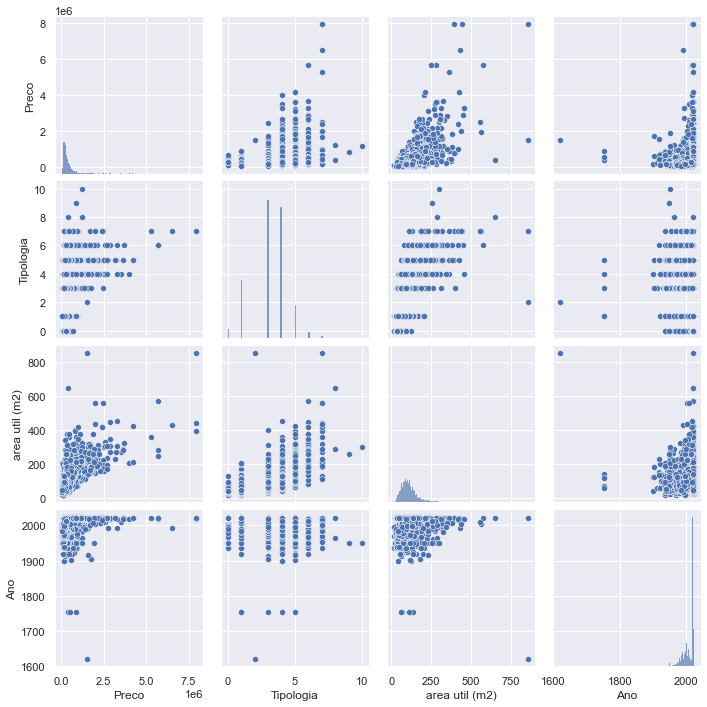

In [43]:
#scatterplot
sns.set()
cols = ['Preco','Tipologia','area util (m2)', 'Ano']
sns.pairplot(data[cols], size = 2.5)
plt.show();

In [44]:
#para processo de redução de dimensões PCA
from sklearn.decomposition import PCA
x = data.iloc[:,8:35]
x

,Varanda,Ar Condicionado,Aspiracao Central,Vista de Campo/Serra,Lareira,Recuperacao de Calor,Suite,Despensa,Garagem (box),Arrecadacao,...,Gas Canalizado,Piscina,Box,Elevador,Kitchenette,Marquise,Parqueamento,Piso Radiante,Terraco,Vista de Lago
0,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,1,0,0,0,1,0
1,1,0,1,0,1,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
2,1,0,1,0,1,1,0,0,1,1,...,1,0,0,1,0,0,0,0,0,0
3,1,1,1,0,1,1,0,0,1,0,...,1,1,0,1,0,0,0,0,0,0
4,1,0,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6223,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6224,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6225,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6226,1,1,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [45]:
pca = PCA(n_components=8)
x = pca.fit_transform(x)
x

array([[-0.58677508, -0.14590323,  0.59575515, ...,  0.65499306,
         0.39688028,  0.58591593],
       [ 0.09545718,  0.32168702,  0.62347088, ..., -0.55339904,
         0.73669544, -0.13391191],
       [ 0.32568589,  0.30748549,  0.7936447 , ..., -0.09405765,
         0.709821  ,  0.11176262],
       ...,
       [ 0.21891893, -0.08236522, -0.12972935, ..., -0.5236934 ,
         0.48557265,  0.3048332 ],
       [ 0.46712339,  0.59459355, -0.72800341, ..., -0.30036259,
         0.70840641,  0.20516915],
       [ 1.28516104,  0.26955671, -0.10836659, ..., -0.1275333 ,
         0.48142101,  0.4280518 ]])

In [46]:
column_names = ["pca1", "pca2", "pca3","pca4","pca5","pca6","pca7","pca8"]
x1 = pd.DataFrame(x, columns=column_names)
x1

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8
0,-0.586775,-0.145903,0.595755,-0.385874,1.104867,0.654993,0.396880,0.585916
1,0.095457,0.321687,0.623471,0.882647,-0.323950,-0.553399,0.736695,-0.133912
2,0.325686,0.307485,0.793645,0.583643,-0.329708,-0.094058,0.709821,0.111763
3,0.157858,1.174489,-0.002718,0.578494,0.440416,-0.398401,0.347617,-0.267889
4,0.293174,0.564087,0.566872,0.056004,-0.423935,0.851074,-0.206289,1.515694
...,...,...,...,...,...,...,...,...
6223,-0.699005,-0.311845,-0.728337,-0.144030,0.471865,-0.133361,-0.587861,0.221471
6224,0.218919,-0.082365,-0.129729,-0.389428,-0.506789,-0.523693,0.485573,0.304833
6225,0.218919,-0.082365,-0.129729,-0.389428,-0.506789,-0.523693,0.485573,0.304833
6226,0.467123,0.594594,-0.728003,-0.231010,-0.770442,-0.300363,0.708406,0.205169


In [47]:
#NÃO SE NORMALIZAM COLUNAS QUE ERAM CATEGORIAS E FORAM TRANSFORMADAS EM NUMERICAS PARA CONTINUAREM A SER TRATADAS COMO CATEGORICAS
z = data [["area util (m2)","No Casas de Banho","Ano"]]
z

,area util (m2),No Casas de Banho,Ano
0,98,1,1990
1,166,3,2021
2,130,3,2020
3,105,2,2020
4,274,3,2003
...,...,...,...
6223,275,3,2014
6224,131,2,1998
6225,131,2,1998
6226,257,3,2014


In [48]:
#padronização Z-score
#gera objeto numpy
sc = StandardScaler()
z1 = sc.fit_transform(z)
z1

array([[-0.23512125, -1.18473629, -0.81518047],
       [ 1.04331433,  1.16511646,  0.70199065],
       [ 0.36649549,  1.16511646,  0.65304964],
       ...,
       [ 0.38529601, -0.00980992, -0.42365244],
       [ 2.75416194,  1.16511646,  0.35940362],
       [ 2.75416194,  1.16511646,  0.35940362]])

In [49]:
column_names1 = ["area util","Casas de Banho","ano"]
z1 = pd.DataFrame(z1, columns=column_names1)
z1

,area util,Casas de Banho,ano
0,-0.235121,-1.184736,-0.815180
1,1.043314,1.165116,0.701991
2,0.366495,1.165116,0.653050
3,-0.103518,-0.009810,0.653050
4,3.073771,1.165116,-0.178947
...,...,...,...
6223,3.092571,1.165116,0.359404
6224,0.385296,-0.009810,-0.423652
6225,0.385296,-0.009810,-0.423652
6226,2.754162,1.165116,0.359404


In [50]:
#agora vamos ao distrito
y = data ["Distrito"]
y

0        BEJA
1       BRAGA
2       BRAGA
3       BRAGA
4       BRAGA
        ...  
6223    VISEU
6224    VISEU
6225    VISEU
6226    VISEU
6227    VISEU
Name: Distrito, Length: 6228, dtype: object

In [51]:
y1 = pd.get_dummies(y)
y1

,AVEIRO,BEJA,BRAGA,BRAGANCA,CASTELO BRANCO,COIMBRA,EVORA,FARO,GUARDA,ILHA DA MADEIRA,...,ILHA DO PICO,LEIRIA,LISBOA,PORTALEGRE,PORTO,SANTAREM,SETUBAL,VIANA DO CASTELO,VILA REAL,VISEU
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6223,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6224,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6225,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6226,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [52]:
#concatena os dados
df = pd.concat([data,x1,z1,y1], axis=1)
df

,Preco,Distrito,area util (m2),Tipologia,Ano,No Casas de Banho,Certificado Energetico,Condicao,Varanda,Ar Condicionado,...,ILHA DO PICO,LEIRIA,LISBOA,PORTALEGRE,PORTO,SANTAREM,SETUBAL,VIANA DO CASTELO,VILA REAL,VISEU
0,165000,BEJA,98,3,1990,1,3,4,0,0,...,0,0,0,0,0,0,0,0,0,0
1,335000,BRAGA,166,4,2021,3,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,225000,BRAGA,130,4,2020,3,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,180000,BRAGA,105,3,2020,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,229000,BRAGA,274,4,2003,3,3,3,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6223,270000,VISEU,275,6,2014,3,0,4,0,1,...,0,0,0,0,0,0,0,0,0,1
6224,160000,VISEU,131,4,1998,2,3,4,1,1,...,0,0,0,0,0,0,0,0,0,1
6225,160000,VISEU,131,4,1998,2,3,4,1,1,...,0,0,0,0,0,0,0,0,0,1
6226,270000,VISEU,257,6,2014,3,0,4,1,1,...,0,0,0,0,0,0,0,0,0,1


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6228 entries, 0 to 6227
Data columns (total 69 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Preco                   6228 non-null   int64  
 1   Distrito                6228 non-null   object 
 2   area util (m2)          6228 non-null   int64  
 3   Tipologia               6228 non-null   int32  
 4   Ano                     6228 non-null   int32  
 5   No Casas de Banho       6228 non-null   int32  
 6   Certificado Energetico  6228 non-null   int32  
 7   Condicao                6228 non-null   int32  
 8   Varanda                 6228 non-null   int32  
 9   Ar Condicionado         6228 non-null   int32  
 10  Aspiracao Central       6228 non-null   int32  
 11  Vista de Campo/Serra    6228 non-null   int32  
 12  Lareira                 6228 non-null   int32  
 13  Recuperacao de Calor    6228 non-null   int32  
 14  Suite                   6228 non-null   

In [54]:
#remover restantes colunas irrelevantes REMOVER AVEIRO DO ONE HOT ENCODER PARA EVITAR A DUMMY VARIABLE TRAP
df.drop(["Distrito","area util (m2)","Ano","No Casas de Banho","Varanda",
         "Ar Condicionado","Aspiracao Central","Vista de Campo/Serra","Lareira","Recuperacao de Calor","Suite","Despensa","Garagem (box)",
        "Arrecadacao","Vista de Mar","Vista de Rio","Cozinha Equipada","Aquecimento Central","Mobilado","Estacionamento","Condominio Fechado","Gas Canalizado",
        "Piscina","Box","Elevador","Kitchenette","Marquise","Parqueamento","Piso Radiante","Terraco","Vista de Lago","Caldeira","AVEIRO"], axis=1, inplace=True)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6228 entries, 0 to 6227
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Preco                   6228 non-null   int64  
 1   Tipologia               6228 non-null   int32  
 2   Certificado Energetico  6228 non-null   int32  
 3   Condicao                6228 non-null   int32  
 4   pca1                    6228 non-null   float64
 5   pca2                    6228 non-null   float64
 6   pca3                    6228 non-null   float64
 7   pca4                    6228 non-null   float64
 8   pca5                    6228 non-null   float64
 9   pca6                    6228 non-null   float64
 10  pca7                    6228 non-null   float64
 11  pca8                    6228 non-null   float64
 12  area util               6228 non-null   float64
 13  Casas de Banho          6228 non-null   float64
 14  ano                     6228 non-null   

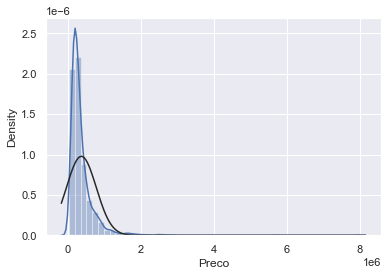

<Figure size 432x288 with 0 Axes>

In [56]:
#histogram and normal probability plot. Ok precisa ser normalizado
sns.distplot(df['Preco'], fit=norm);
fig = plt.figure()

In [57]:
#applying log transformation
df['Preco'] = np.log(df['Preco'])

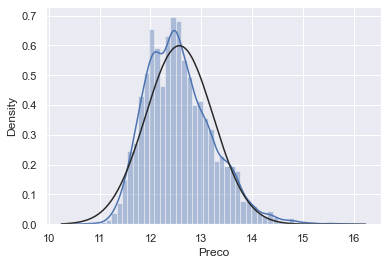

<Figure size 432x288 with 0 Axes>

In [58]:
#transformed histogram and normal probability plot. Agora ok!!!
sns.distplot(df['Preco'], fit=norm);
fig = plt.figure()

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6228 entries, 0 to 6227
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Preco                   6228 non-null   float64
 1   Tipologia               6228 non-null   int32  
 2   Certificado Energetico  6228 non-null   int32  
 3   Condicao                6228 non-null   int32  
 4   pca1                    6228 non-null   float64
 5   pca2                    6228 non-null   float64
 6   pca3                    6228 non-null   float64
 7   pca4                    6228 non-null   float64
 8   pca5                    6228 non-null   float64
 9   pca6                    6228 non-null   float64
 10  pca7                    6228 non-null   float64
 11  pca8                    6228 non-null   float64
 12  area util               6228 non-null   float64
 13  Casas de Banho          6228 non-null   float64
 14  ano                     6228 non-null   

In [60]:
label = df['Preco']
features = df.iloc[:,1:36]


In [ ]:
#RANDOM FOREST REGRESSOR

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
#DIVISÃO DO TREINO E TESTE (70% TREINO 30% TESTE)
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size = 0.3, random_state = 0)

In [63]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [64]:
y_pred = regressor.predict(x_test)

In [65]:
comp =pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
comp

,Actual,Predicted
6032,12.100712,12.160678
3541,13.664688,13.520918
4892,12.429216,12.319871
1108,12.429216,12.325369
5459,11.552146,11.757705
...,...,...
233,13.091904,12.923331
4386,12.128111,12.145566
271,11.661345,11.768787
813,11.917724,12.053543


In [66]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
print('R squared: {:.2f}'.format(regressor.score(features,label)*100))

Mean Absolute Error: 0.222084403743408
Mean Square Error: 0.09779785581637085
Root Mean Square Error: 0.3127264872318474
R squared: 91.43
